## FOOOFGroup

<div class="alert alert-success">
This tutorial covers running FOOOF across multiple power spectra, using FOOOFGroup, an object derived from the base FOOOF object.
</div>

<div class="alert alert-info">
For a more specific exploration of the base FOOOF object, and the underlying algorithm, go [here](02-FOOOF.ipynb).
</div>

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline

# FOOOF imports: get FOOOF & FOOOFGroup objects
from fooof import FOOOFGroup

# Import some utilities for synthesizing some test data
from fooof.synth import gen_group_power_spectra

### Synthesizing Power Spectra

FOOOF includes some basic support for creating synthetic power-spectra, that mimic real data. 

Here we will use that functionality to create a matrix of power spectra to test with. 

In [2]:
# TODO
#  This function will create power spectra with slope values randomly chosen from {1.5, 2.0, 2.5}
#    with oscillations potentially added, with CF of either 10 or 20 Hz.
bgp_opts = [[20, 2], [50, 2.5], [35, 1.5]]
gauss_opts = [[], [10, 0.5, 2], [10, 0.5, 2, 20, 0.3, 4]]

In [3]:
# Generate the group of synthetic spectra
freqs, spectra = gen_group_power_spectra(10, [3, 40], bgp_opts, gauss_opts)

### FOOOFGroup

The FOOOFGroup object is very similar to the FOOOF object (programmatically, it inherits from the FOOOF object), and can be used in the same way. The main difference is that instead of running across a single power spectrum, it operates across matrices of multiple power spectra. 

Note that by 'group' we mean merely to refer to a group of power-spectra, not necessarily to a group in terms of multiple subjects or similar. Most likely, a FOOOFGroup will be run across a collection of spectra from across channels, and/or across trials, within or across subjects. 

The main different with the FOOOFGroup object, is that it also contains a 'power_spectra' attribute, which stores the matrix of power-spectra to be fit, and collects fit results into a 'group_results' attribute. Otherwise, FOOOFGroup supports all the same functionality, accessed in the same way as the FOOOF object.

Internally, it runs the exact same fitting procedure, per spectrum, as the FOOOF object.

In [4]:
# Initialize a FOOOFGroup object. It accepts all the same settings as FOOOF()
fg = FOOOFGroup(peak_width_limits=[1, 8], min_peak_amplitude=0.05, max_n_peaks=6)

In [5]:
# Fit a group of power spectra with the .fit() method
#  The key difference (compared to FOOOF) is that it takes a 2D array of spectra, in the shape [n_spectra, n_freqs]
fg.fit(freqs, spectra)

In [6]:
# Print out results
fg.print_results()

                         FOOOF - GROUP RESULTS                        
               Number of power spectra in the Group: 10               
          The model was run on the frequency range 3 - 40 Hz          
                   Frequency Resolution is 0.50 Hz                    
                Power spectra were fit without a knee.                
                       Background Slope Values                        
                Min: 1.5253, Max: 2.5280, Mean: 2.1127                
           In total 10 peaks were extracted from the group            
                       Goodness of fit metrics:                       
              R2s -  Min: 0.9990, Max: 1.0000, Mean: 0.9995           
           Errors -  Min: 0.0033, Max: 0.0151, Mean: 0.0088           


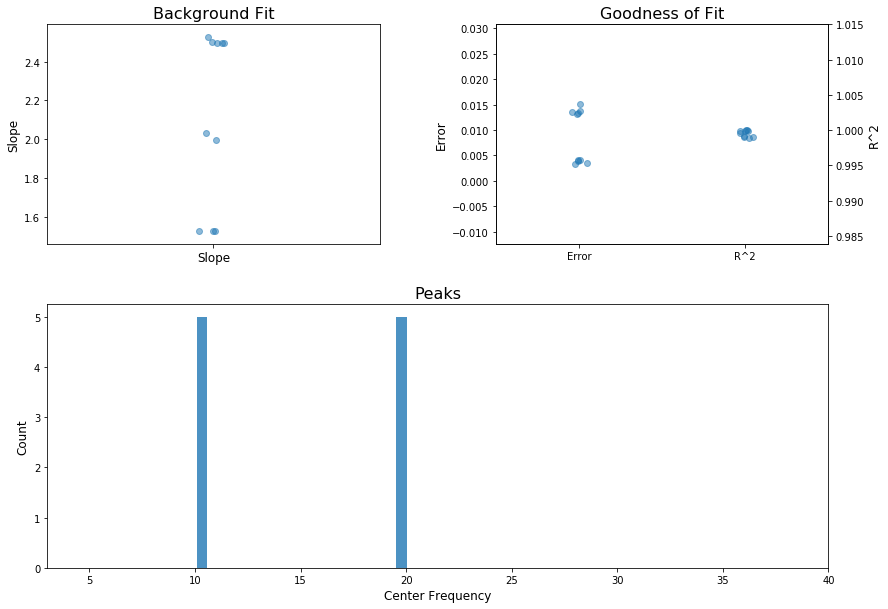

In [7]:
# Plot a summary of the results across the group
#  Note: given the simulations, we expect slopes at {1.5, 2.0. 2.5} and peaks around {10, 20}
fg.plot()

In [8]:
# Just as with the FOOOF object, you can call 'report' to run the fitting, and print results & plots
#  In this case, the results printed will be summary of the model fit results across the group of power spectra
# fg.report(freqs, spectra)

In [9]:
# You can also save out reports for FOOOFGroup fits
#  This also saves out a pdf report, with the plot and results (same as above) collected together
fg.save_report()

In [10]:
# Check what the generated report looks like
from IPython.display import IFrame
IFrame("FOOOFGroup_Report.pdf", width=950, height=1200)

### FOOOFGroup Data

FOOOFGroup collects fits across power spectra into a list of FOOOFResults objects. 

In [11]:
# As it runs, FOOOFGroup collects each fit results in 'group_results'
#  'group_results' is a list of FOOOFResult objects
fg.group_results[0:2]

[FOOOFResult(background_params=array([ 19.99779473,   1.9981568 ]), peak_params=array([], shape=(0, 3), dtype=float64), r_squared=0.9999409391880425, error=0.0032841225814295664, gaussian_params=array([], dtype=float64)),
 FOOOFResult(background_params=array([ 49.99311306,   2.49443488]), peak_params=array([], shape=(0, 3), dtype=float64), r_squared=0.99994749552589335, error=0.0040491545215094035, gaussian_params=array([], dtype=float64))]

In [12]:
# In order to parse this data, and retrieve specific results, you can use the 'get_all_data' method
#  'get_all_data' let's you grab data by specifying a FOOOFResult field and (optionally) an index
sls = fg.get_all_data('background_params', 1)
cfs = fg.get_all_data('peak_params', 0)

In [13]:
# Check the fit center-frequencies and slope values
print(cfs)
print(sls)

[ 10.12077902  19.94142784  10.11697175  20.00735     10.08966301
  19.99620399  10.1287337   20.0290876   10.07417221  19.95419736]
[ 1.9981568   2.49443488  2.0300006   1.52631887  2.49874553  2.49607178
  2.50147106  1.52528169  1.52842404  2.52798892]


### Saving & Loading with FOOOFGroup

FOOOFGroup also support saving and loading, with same function API as FOOOF. 

In [14]:
# Save out FOOOFGroup results
fg.save(save_results=True)

In [15]:
# You can then reload this group data
nfg = FOOOFGroup()
nfg.load()

In [16]:
# Print results to check that the loaded group 
nfg.print_results()

                         FOOOF - GROUP RESULTS                        
               Number of power spectra in the Group: 10               
          The model was run on the frequency range 3 - 40 Hz          
                   Frequency Resolution is 0.50 Hz                    
                Power spectra were fit without a knee.                
                       Background Slope Values                        
                Min: 1.5253, Max: 2.5280, Mean: 2.1127                
           In total 10 peaks were extracted from the group            
                       Goodness of fit metrics:                       
              R2s -  Min: 0.9990, Max: 1.0000, Mean: 0.9995           
           Errors -  Min: 0.0033, Max: 0.0151, Mean: 0.0088           


TODO: Notes on saving.

### Parallel Support

FOOOFGroup also has support for running in parallel.

The fit method includes an optional parameter 'n_jobs', which if set at 1, will run FOOOF linearly, but otherwise will launch n_jobs number of jobs, in parallel. Setting n_jobs to -1 will launch in parallel across all available cores. 

Note, however, that running FOOOF in parallel does not gaurantee a quicker runtime overall. The computation time per FOOOF-fit scales with the frequency range fit over, and the 'complexity' of the power spectra, in terms of number of peaks. For relatively small numbers of power spectra (less than ~100), across relatively small frequency ranges (say ~3-40Hz), running in parallel may offer no appreciable speed up. 

In [17]:
# Run FOOOF fit across a group of power spectra in parallel, using all cores
fg.fit(freqs, spectra, n_jobs=-1)

### Plotting Individual Fits

When running FOOOF across a group of power spectra, results are stored as the FOOOFResults, which store (only) the results of the model fit, not the full model fits themselves. To examine individual model fits, FOOOFGroup can regenerate FOOOF objects for individual power spectra, with the full model available for visualization.

In [18]:
# Extract a particular spectrum, specified by index to a FOOOF object, and set to regenerate the model
fm = fg.get_fooof(ind=2, regenerate=True)

                     FOOOF - POWER SPECTRUM MODEL                     
          The model was run on the frequency range 3 - 40 Hz          
                   Frequency Resolution is 0.50 Hz                    
               Background Parameters (offset, slope):                 
                           20.0642, 2.0300                            
                         2 peaks were found:                          
                  CF:  10.12, Amp:  0.472, BW:  3.66                  
                  CF:  19.94, Amp:  0.267, BW:  7.13                  
                       Goodness of fit metrics:                       
                      R^2 of model fit is 0.9992                      
                  Root mean squared error is 0.0151                   


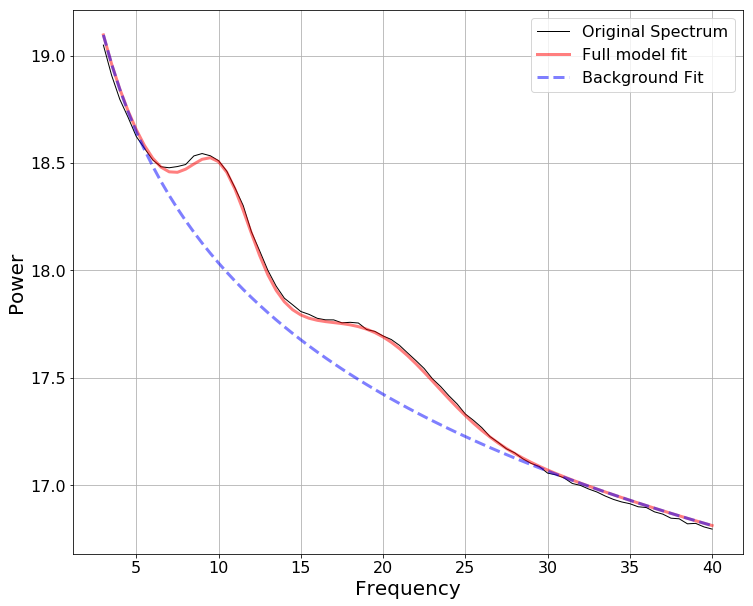

In [19]:
# Print results and plot extracted FOOOF model fit
fm.print_results()
fm.plot()

<div class="alert alert-info">
To continue with the tutorial, with more examples of setting parameters, getting good fits, and troubleshooting issues, go [here](05-Tuning&Troubleshooting.ipynb).
</div>